In [57]:
# Import Libraries
import pandas as pd 
import numpy as np
import warnings
# Building Model
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from scipy import stats
import statsmodels
from sklearn.model_selection import train_test_split
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt # import matplotlib for visualization and graphing
import statsmodels.api as sm

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('ggplot')



In [4]:
#Load dataset
# all data were calculated by the publisher by dividing each value by the first which is Nov. 1978 and multiplying by 100
# additional data like crude_oil, cci, & unemployment_rate were calculated by mean 
# the same way to bring variables into the same format
# these variables are named variablename_idx
inflation = "C:\\Users\\Owner\\Documents\\DSC680\\inflation_1978_2022_REV.csv" 
# assumes file is in same directory as this notebook
inflation_df = pd.read_csv(inflation) # saving dataset into a Pandas DataFrame
print(inflation_df) # viewing data, contains 520 rows & 15 columns

     year  month      cpi    gas  electricity     food  shelter  \
0    1978     11   67.700  0.695        0.046   74.700   63.300   
1    1978     12   68.100  0.705        0.046   75.100   63.500   
2    1979      1   68.700  0.716        0.046   76.400   64.000   
3    1979      2   69.500  0.730        0.047   77.700   64.900   
4    1979      3   70.300  0.755        0.047   78.400   65.500   
..    ...    ...      ...    ...          ...      ...      ...   
515  2021     10  271.552  3.385        0.142  283.912  338.865   
516  2021     11  273.042  3.482        0.142  286.050  340.475   
517  2021     12  273.925  3.408        0.142  287.440  341.963   
518  2022      1  276.296  3.413        0.147  289.959  342.974   
519  2022      2  278.943  3.592        0.148  292.912  344.758   

     transportation  medical_care  unemployment_rate  employment_pop_ratio  \
0            66.000        63.900                5.9                  59.8   
1            66.400        64.100      

In [5]:
inflation_df.head() # looking at first 5 rows of data

year  month   cpi    gas  electricity  food  shelter  transportation  \
0  1978     11  67.7  0.695        0.046  74.7     63.3            66.0   
1  1978     12  68.1  0.705        0.046  75.1     63.5            66.4   
2  1979      1  68.7  0.716        0.046  76.4     64.0            66.7   
3  1979      2  69.5  0.730        0.047  77.7     64.9            67.0   
4  1979      3  70.3  0.755        0.047  78.4     65.5            67.4   

   medical_care  unemployment_rate  employment_pop_ratio pres_political_party  \
0          63.9                5.9                  59.8             democrat   
1          64.1                6.0                  59.8             democrat   
2          65.0                5.9                  59.9             democrat   
3          65.5                5.9                  60.1             democrat   
4          65.9                5.8                  60.0             democrat   

        cci  crude_oil                         cause  
0  98.41457        0.0  fed raised and lowered rates  
1  98.03396        0.0                           NaN  
2  98.00642        0.0   iran-iraq war, fed rate 20%  
3  97.98978        0.0                           NaN  
4  97.78210        0.0                           NaN

In [6]:
inflation_df.describe() # looking at descriptive statistics of overall dataset

year       month         cpi        gas  electricity  \
count   520.000000  520.000000  520.000000  520.00000   520.000000   
mean   2000.000000    6.500000  170.332646    1.84741     0.101473   
std      12.523581    3.470215   53.912128    0.88085     0.025242   
min    1978.000000    1.000000   67.700000    0.69500     0.046000   
25%    1989.000000    3.000000  123.500000    1.14300     0.084000   
50%    2000.000000    6.500000  169.250000    1.39700     0.092000   
75%    2011.000000   10.000000  221.848750    2.56175     0.128250   
max    2022.000000   12.000000  278.943000    4.09000     0.148000   

             food     shelter  transportation  medical_care  \
count  520.000000  520.000000      520.000000    520.000000   
mean   173.899594  196.606744      200.697123    278.092954   
std     57.223604   73.738312       75.431442    138.740409   
min     74.700000   63.300000       66.000000     63.900000   
25%    126.200000  133.850000      136.900000    151.450000   
50%    167.850000  193.350000      196.050000    260.950000   
75%    226.289000  250.474000      266.909250    398.953500   
max    292.912000  344.758000      334.305000    536.932000   

       unemployment_rate  employment_pop_ratio         cci   crude_oil  
count         520.000000            520.000000  520.000000  520.000000  
mean            6.205769             61.002885   99.929960   37.473000  
std             1.742212              2.107636    1.590384   31.137209  
min             3.500000             51.300000   95.860260    0.000000  
25%             4.900000             59.300000   98.646343   17.152500  
50%             5.800000             61.200000  100.460650   26.275000  
75%             7.300000             62.800000  101.032300   59.050000  
max            14.700000             64.700000  103.004200  133.880000

In [7]:
inflation_df.info()
# variables which are numerical will have standard numerical analysis applied

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  520 non-null    int64  
 1   month                 520 non-null    int64  
 2   cpi                   520 non-null    float64
 3   gas                   520 non-null    float64
 4   electricity           520 non-null    float64
 5   food                  520 non-null    float64
 6   shelter               520 non-null    float64
 7   transportation        520 non-null    float64
 8   medical_care          520 non-null    float64
 9   unemployment_rate     520 non-null    float64
 10  employment_pop_ratio  520 non-null    float64
 11  pres_political_party  520 non-null    object 
 12  cci                   520 non-null    float64
 13  crude_oil             520 non-null    float64
 14  cause                 23 non-null     object 
dtypes: float64(11), int64(2

In [8]:
# convert variables 'year' and 'month' to objects instead of integers
inflation_df['year'] = inflation_df['year'].astype(object)
inflation_df['month'] = inflation_df['month'].astype(object)

In [9]:
# add index column to dataset
def make_index(yr, mo):
    return str(yr) + "_" + str(mo)

# calculated column with input from 2 columns
inflation_df["ym"] = inflation_df.apply(lambda x: make_index(x["year"], x["month"]), axis=1)
#set index to calculated column
inflation_df = inflation_df.set_index("ym")
print(inflation_df.head())

         year month   cpi    gas  electricity  food  shelter  transportation  \
ym                                                                             
1978_11  1978    11  67.7  0.695        0.046  74.7     63.3            66.0   
1978_12  1978    12  68.1  0.705        0.046  75.1     63.5            66.4   
1979_1   1979     1  68.7  0.716        0.046  76.4     64.0            66.7   
1979_2   1979     2  69.5  0.730        0.047  77.7     64.9            67.0   
1979_3   1979     3  70.3  0.755        0.047  78.4     65.5            67.4   

         medical_care  unemployment_rate  employment_pop_ratio  \
ym                                                               
1978_11          63.9                5.9                  59.8   
1978_12          64.1                6.0                  59.8   
1979_1           65.0                5.9                  59.9   
1979_2           65.5                5.9                  60.1   
1979_3           65.9                5.8   

In [10]:
# Crude Oil is priced per barrel. A relative index variable needs to be made.
first_crude_oil = 22.93 # extracted from raw data
inflation_df["crude_oil_idx"] = (inflation_df["crude_oil"] - first_crude_oil) / first_crude_oil * 100.0


In [11]:
# CCI needs to be modified. A relative index variable needs to be made.
first_cci = 98.41457 # extracted from raw data
inflation_df["cci_idx"] = (inflation_df["cci"] - first_cci) / first_cci * 100.0


In [12]:
# Unemployment Rate needs to be modified. A relative index variable needs to be made.
first_unemployment_rate = 5.9 # extracted from raw data
inflation_df["unemployment_rate_idx"] = (inflation_df["unemployment_rate"] - first_unemployment_rate) / first_unemployment_rate * 100.0

In [13]:
# Gas needs to be modified. A relative index variable needs to be made.
first_gas = 0.695 # extracted from raw data
inflation_df["gas_idx"] = (inflation_df["gas"] - first_gas) / first_gas * 100.0

In [14]:
# Employment Population Ratio needs to be modified. A relative index variable needs to be made.
first_employment_pop_ratio = 59.8 # extracted from raw data
inflation_df["employment_pop_ratio_idx"] = (inflation_df["employment_pop_ratio"] - first_employment_pop_ratio) / first_employment_pop_ratio * 100.0

In [15]:
#print(type(inflation_df.columns))
cols_to_remove = ["year", "month", "cause", "crude_oil", "cci", "gas", "employment_pop_ratio", "unemployment_rate"]

inflation_df.drop(cols_to_remove, axis = 1, inplace = True)

print(inflation_df.columns)
print(inflation_df.head())

Index(['cpi', 'electricity', 'food', 'shelter', 'transportation',
       'medical_care', 'pres_political_party', 'crude_oil_idx', 'cci_idx',
       'unemployment_rate_idx', 'gas_idx', 'employment_pop_ratio_idx'],
      dtype='object')
          cpi  electricity  food  shelter  transportation  medical_care  \
ym                                                                        
1978_11  67.7        0.046  74.7     63.3            66.0          63.9   
1978_12  68.1        0.046  75.1     63.5            66.4          64.1   
1979_1   68.7        0.046  76.4     64.0            66.7          65.0   
1979_2   69.5        0.047  77.7     64.9            67.0          65.5   
1979_3   70.3        0.047  78.4     65.5            67.4          65.9   

        pres_political_party  crude_oil_idx   cci_idx  unemployment_rate_idx  \
ym                                                                             
1978_11             democrat         -100.0  0.000000               0.000000   

In [16]:
inflation_df.describe() # removed 'year', 'month', 'cause', 'cci' and 'crude oil' 'employment pop ratio', 'unemployment ratio' look at statistical analysis


cpi  electricity        food     shelter  transportation  \
count  520.000000   520.000000  520.000000  520.000000      520.000000   
mean   170.332646     0.101473  173.899594  196.606744      200.697123   
std     53.912128     0.025242   57.223604   73.738312       75.431442   
min     67.700000     0.046000   74.700000   63.300000       66.000000   
25%    123.500000     0.084000  126.200000  133.850000      136.900000   
50%    169.250000     0.092000  167.850000  193.350000      196.050000   
75%    221.848750     0.128250  226.289000  250.474000      266.909250   
max    278.943000     0.148000  292.912000  344.758000      334.305000   

       medical_care  crude_oil_idx     cci_idx  unemployment_rate_idx  \
count    520.000000     520.000000  520.000000             520.000000   
mean     278.092954      63.423463    1.539802               5.182529   
std      138.740409     135.792452    1.616005              29.529023   
min       63.900000    -100.000000   -2.595459             -40.677966   
25%      151.450000     -25.196249    0.235506             -16.949153   
50%      260.950000      14.587876    2.079042              -1.694915   
75%      398.953500     157.522896    2.659901              23.728814   
max      536.932000     483.863934    4.663568             149.152542   

          gas_idx  employment_pop_ratio_idx  
count  520.000000                520.000000  
mean   165.814333                  2.011513  
std    126.741052                  3.524475  
min      0.000000                -14.214047  
25%     64.460432                 -0.836120  
50%    101.007194                  2.341137  
75%    268.597122                  5.016722  
max    488.489209                  8.193980

Text(0, 0.5, 'Index')

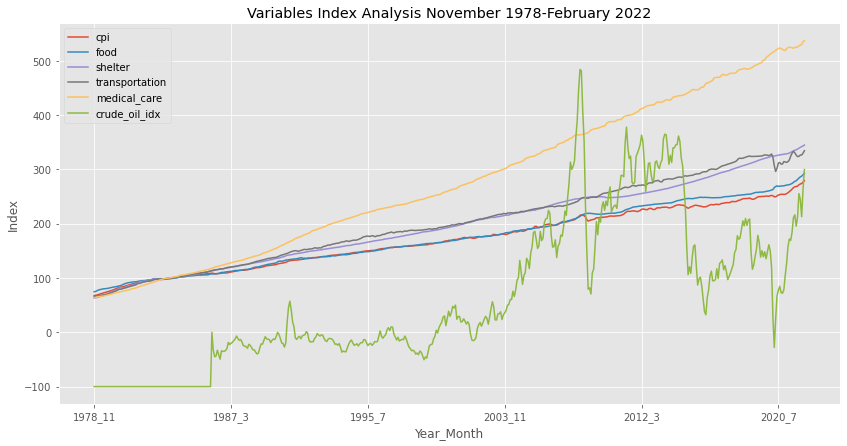

In [17]:
# plot of CPI variables & crude oil index
inflation_df[["cpi", "food", "shelter", "transportation", "medical_care", "crude_oil_idx"]].plot()
plt.title("Variables Index Analysis November 1978-February 2022")
plt.xlabel("Year_Month")
plt.ylabel("Index")

Text(0, 0.5, 'Index')

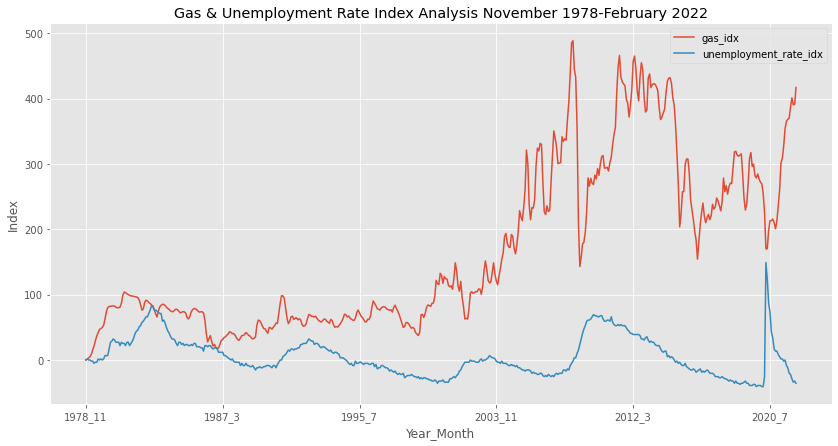

In [18]:
# plot of variables
inflation_df[["gas_idx", "unemployment_rate_idx"]].plot()
plt.title("Gas & Unemployment Rate Index Analysis November 1978-February 2022")
plt.xlabel("Year_Month")
plt.ylabel("Index")

Text(0, 0.5, 'Index')

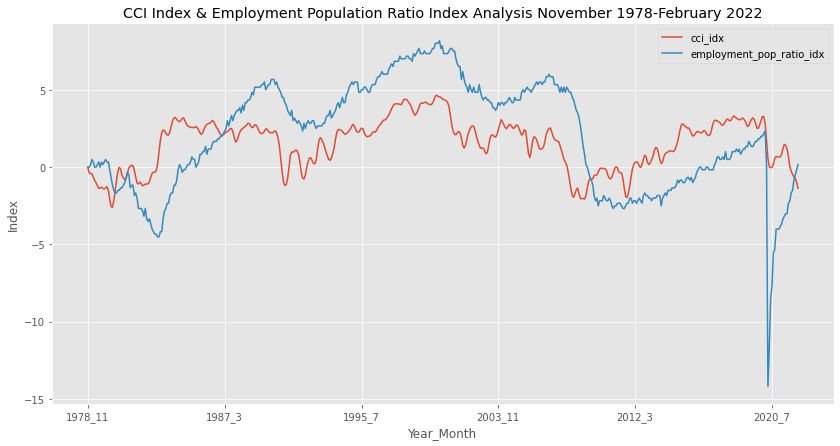

In [19]:
# plot of variables
inflation_df[["cci_idx", "employment_pop_ratio_idx"]].plot()
plt.title("CCI Index & Employment Population Ratio Index Analysis November 1978-February 2022")
plt.xlabel("Year_Month")
plt.ylabel("Index")

Index(['cpi', 'electricity', 'food', 'shelter', 'transportation',
       'medical_care', 'pres_political_party', 'crude_oil_idx', 'cci_idx',
       'unemployment_rate_idx', 'gas_idx', 'employment_pop_ratio_idx'],
      dtype='object')


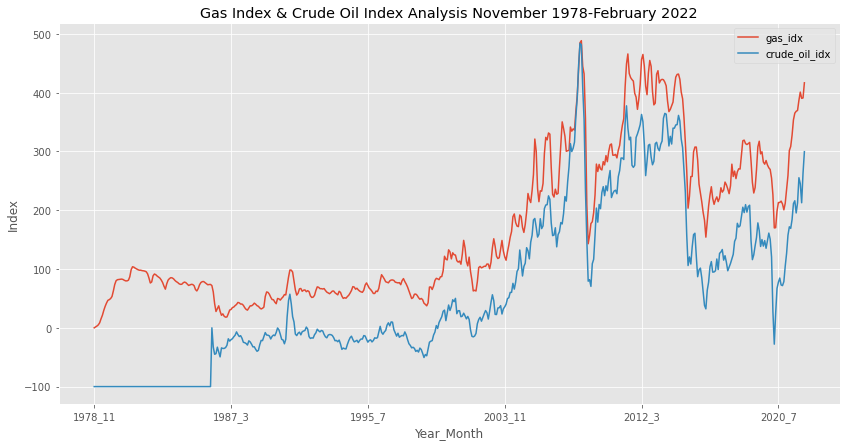

In [20]:
# plot of variables
inflation_df[["gas_idx", "crude_oil_idx"]].plot()
plt.title("Gas Index & Crude Oil Index Analysis November 1978-February 2022")
plt.xlabel("Year_Month")
plt.ylabel("Index")
print(inflation_df.columns)

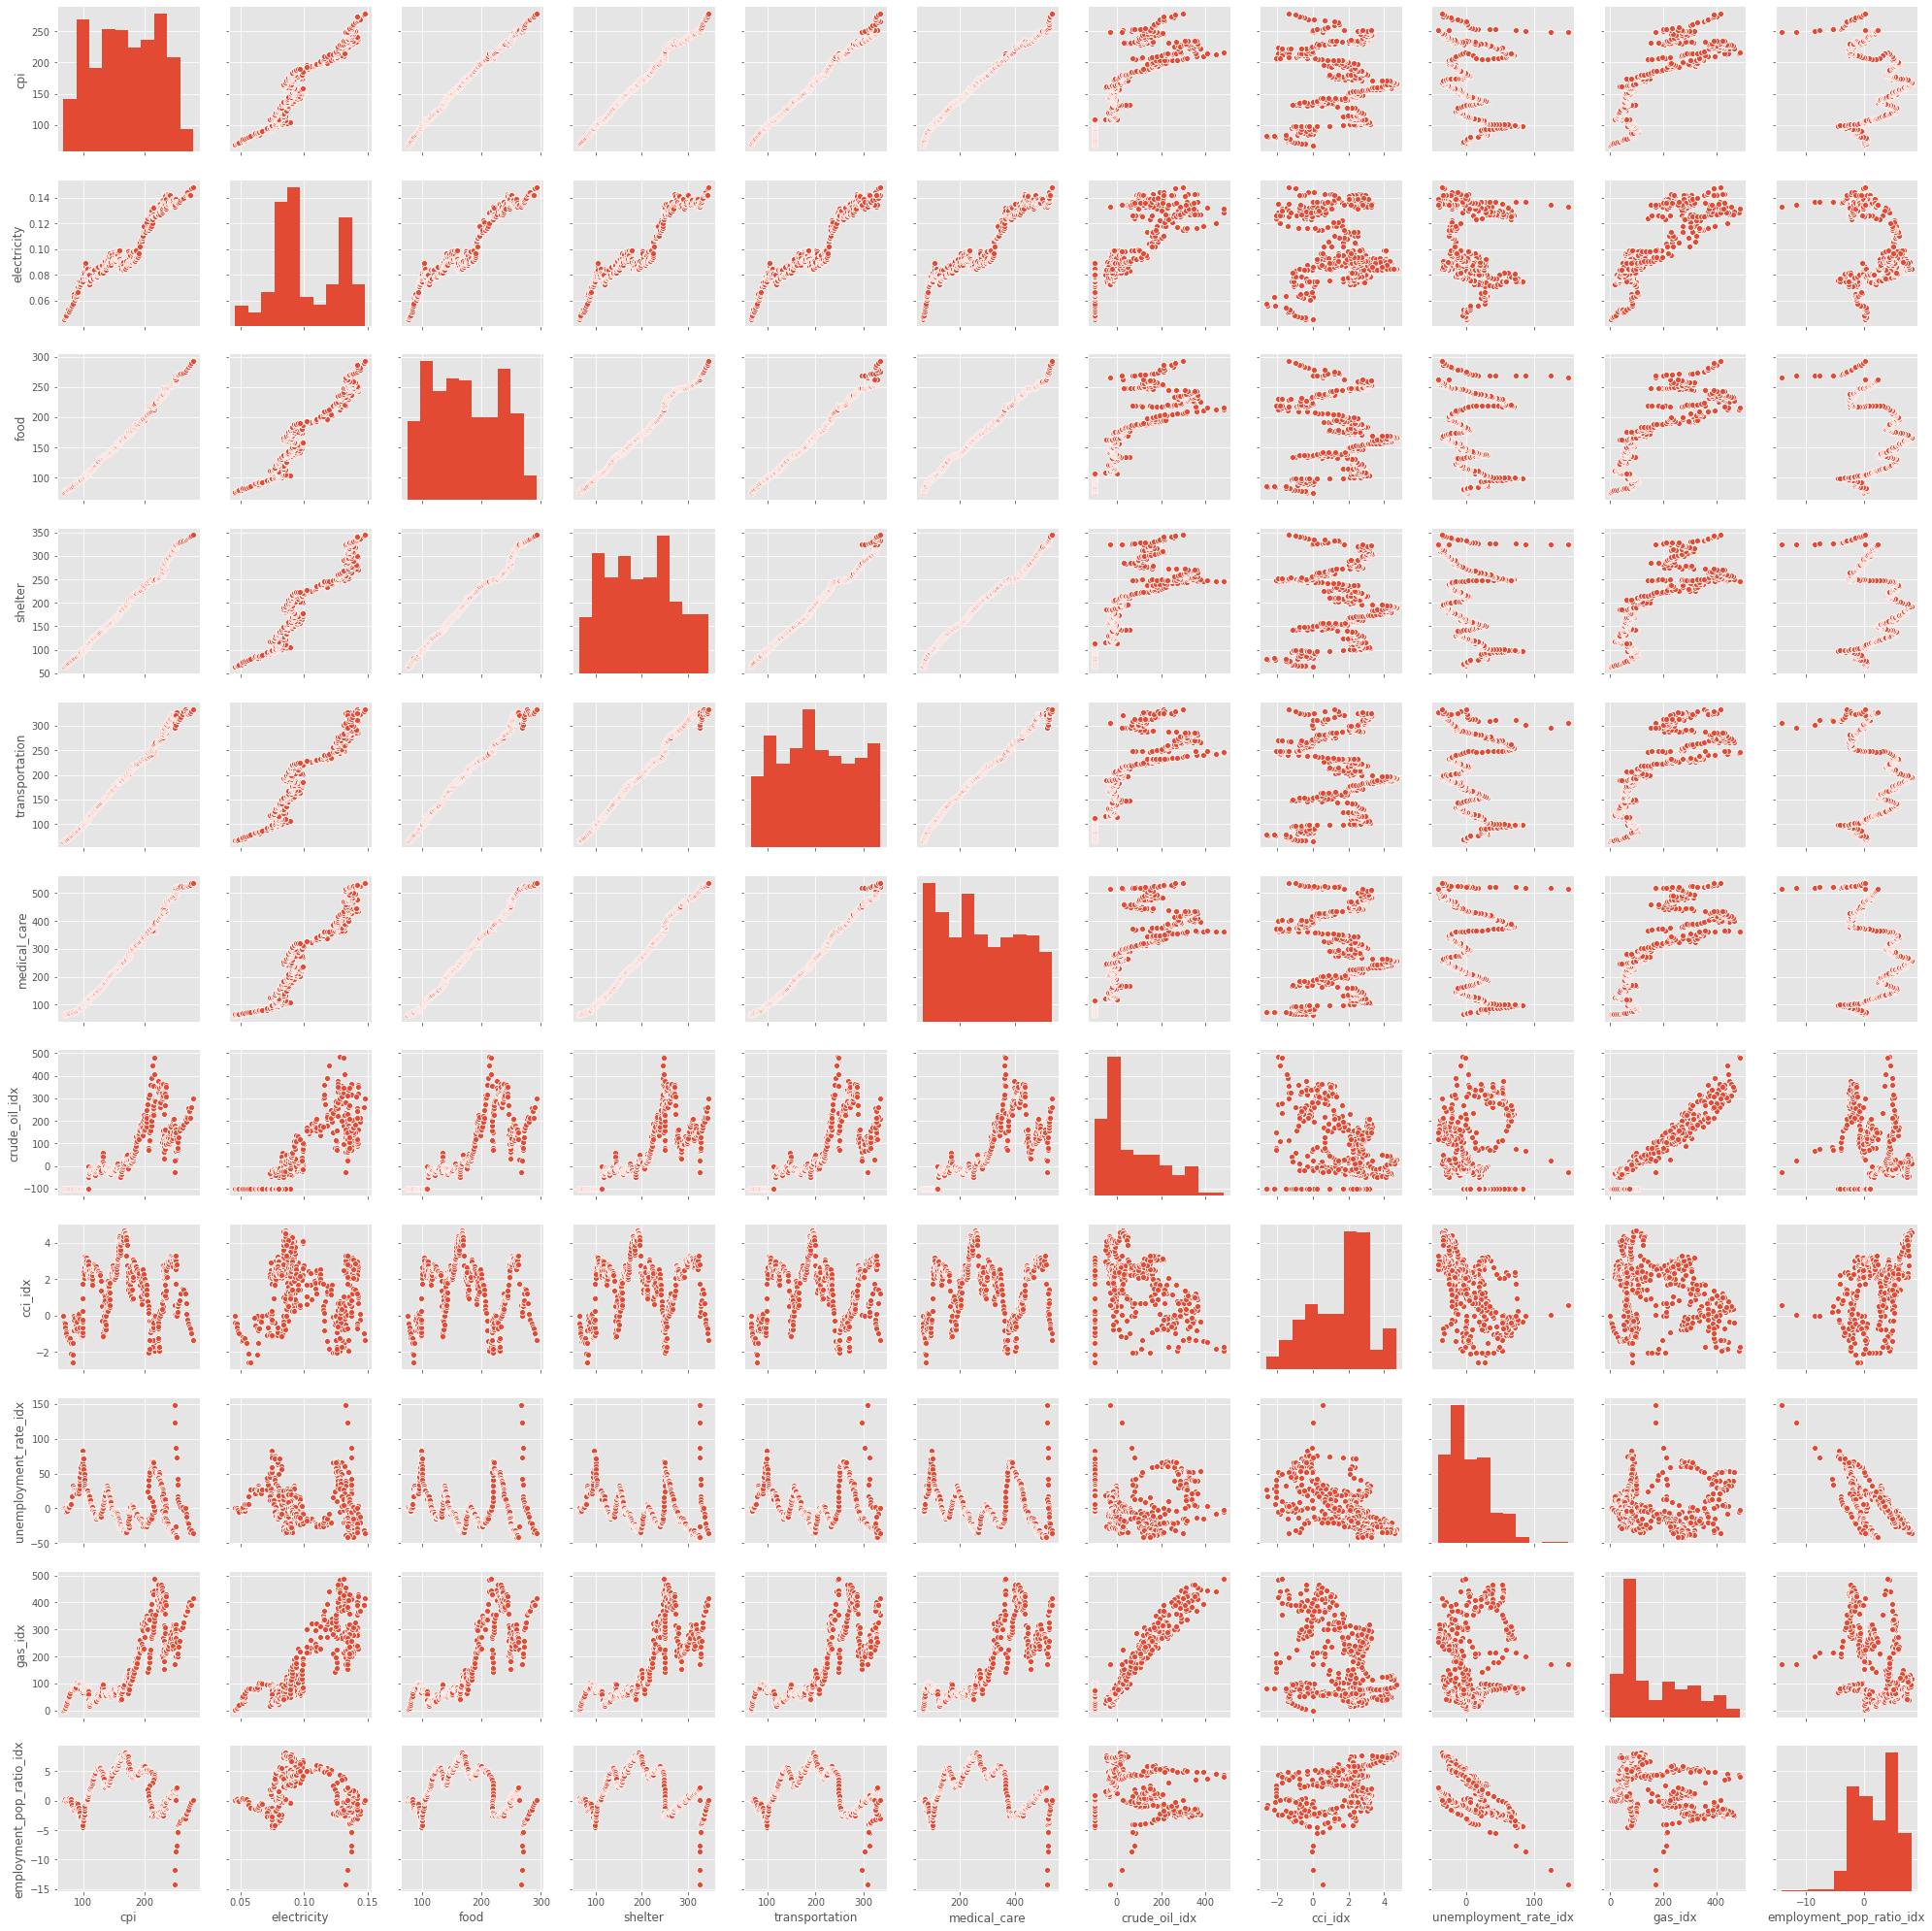

In [21]:
sns.pairplot(inflation_df)
# looking at data it appears there are positive correlated relationships between 
# cpi and: electricity, food, shelter, transportation, medical care

In [22]:
inflation_df.corr()
# cpi, electricity, food, shelter, transportation, and medical care show a high positive relationship with r score of 1

cpi  electricity      food   shelter  \
cpi                       1.000000     0.956080  0.997556  0.995951   
electricity               0.956080     1.000000  0.959658  0.944936   
food                      0.997556     0.959658  1.000000  0.995505   
shelter                   0.995951     0.944936  0.995505  1.000000   
transportation            0.996409     0.952092  0.995730  0.995757   
medical_care              0.995505     0.954116  0.998142  0.996580   
crude_oil_idx             0.821152     0.823553  0.810301  0.781761   
cci_idx                   0.040527    -0.036171  0.018976  0.060954   
unemployment_rate_idx    -0.230748    -0.090571 -0.214773 -0.257748   
gas_idx                   0.819845     0.846684  0.816806  0.784884   
employment_pop_ratio_idx -0.171557    -0.318211 -0.214809 -0.170054   

                          transportation  medical_care  crude_oil_idx  \
cpi                             0.996409      0.995505       0.821152   
electricity                     0.952092      0.954116       0.823553   
food                            0.995730      0.998142       0.810301   
shelter                         0.995757      0.996580       0.781761   
transportation                  1.000000      0.996205       0.794404   
medical_care                    0.996205      1.000000       0.796872   
crude_oil_idx                   0.794404      0.796872       1.000000   
cci_idx                         0.075596      0.028324      -0.234173   
unemployment_rate_idx          -0.257641     -0.223679      -0.048266   
gas_idx                         0.792835      0.808120       0.946958   
employment_pop_ratio_idx       -0.165350     -0.220945      -0.193516   

                           cci_idx  unemployment_rate_idx   gas_idx  \
cpi                       0.040527              -0.230748  0.819845   
electricity              -0.036171              -0.090571  0.846684   
food                      0.018976              -0.214773  0.816806   
shelter                   0.060954              -0.257748  0.784884   
transportation            0.075596              -0.257641  0.792835   
medical_care              0.028324              -0.223679  0.808120   
crude_oil_idx            -0.234173              -0.048266  0.946958   
cci_idx                   1.000000              -0.582325 -0.290921   
unemployment_rate_idx    -0.582325               1.000000  0.026222   
gas_idx                  -0.290921               0.026222  1.000000   
employment_pop_ratio_idx  0.538252              -0.705483 -0.379426   

                          employment_pop_ratio_idx  
cpi                                      -0.171557  
electricity                              -0.318211  
food                                     -0.214809  
shelter                                  -0.170054  
transportation                           -0.165350  
medical_care                             -0.220945  
crude_oil_idx                            -0.193516  
cci_idx                                   0.538252  
unemployment_rate_idx                    -0.705483  
gas_idx                                  -0.379426  
employment_pop_ratio_idx                  1.000000

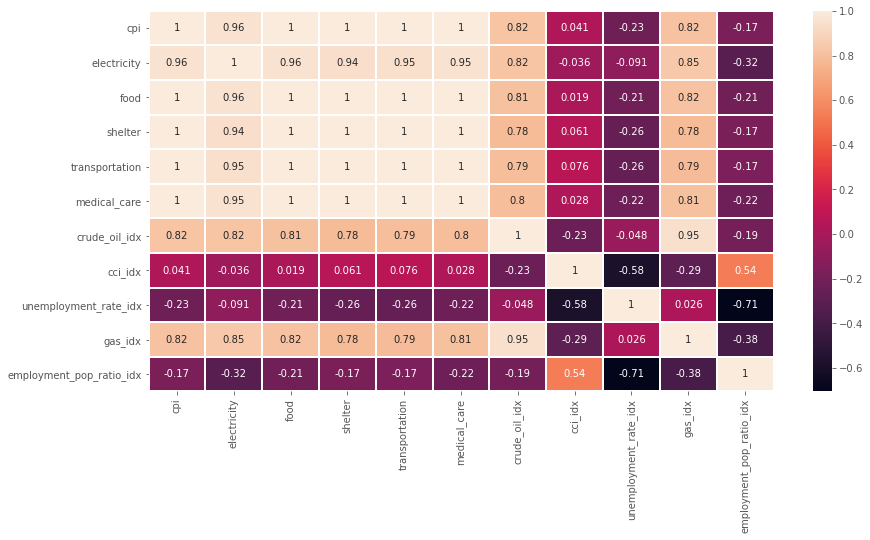

In [23]:
# plotting heatmap to see results
sns.heatmap(inflation_df.corr(), annot=True, lw=1)

In [24]:
# making a subset dataframe using variables 'electricity', 'transportation', 'medical_care', 
# 'unemployment_rate_idx', 'cci_idx', 'crude_oil_idx', and 'pres_political_party'
subset_df_nonstd = inflation_df[["electricity", "transportation", "medical_care", "unemployment_rate_idx", "cci_idx", "crude_oil_idx", "pres_political_party"]]

In [25]:
# define predictor variable columns
df_x = inflation_df[["electricity", "transportation", "medical_care", "unemployment_rate_idx", "cci_idx", "crude_oil_idx"]]

In [26]:
# this is the 2nd standardization for the subset https://www.statology.org/standardize-data-python/
# standardize the values for each predictor variable
inflation_df[["electricity", "transportation", "medical_care", "unemployment_rate_idx", "cci_idx", "crude_oil_idx"]] = (df_x-df_x.mean())/df_x.std()

In [27]:
inflation_df.head()

cpi  electricity  food  shelter  transportation  medical_care  \
ym                                                                        
1978_11  67.7    -2.197629  74.7     63.3       -1.785689     -1.543840   
1978_12  68.1    -2.197629  75.1     63.5       -1.780387     -1.542398   
1979_1   68.7    -2.197629  76.4     64.0       -1.776409     -1.535911   
1979_2   69.5    -2.158013  77.7     64.9       -1.772432     -1.532307   
1979_3   70.3    -2.158013  78.4     65.5       -1.767129     -1.529424   

        pres_political_party  crude_oil_idx   cci_idx  unemployment_rate_idx  \
ym                                                                             
1978_11             democrat       -1.20348 -0.952845              -0.175506   
1978_12             democrat       -1.20348 -1.192165              -0.118108   
1979_1              democrat       -1.20348 -1.209481              -0.175506   
1979_2              democrat       -1.20348 -1.219944              -0.175506   
1979_3              democrat       -1.20348 -1.350529              -0.232905   

          gas_idx  employment_pop_ratio_idx  
ym                                           
1978_11  0.000000                  0.000000  
1978_12  1.438849                  0.000000  
1979_1   3.021583                  0.167224  
1979_2   5.035971                  0.501672  
1979_3   8.633094                  0.334448

In [28]:
subset_df = inflation_df
print(subset_df.head())

          cpi  electricity  food  shelter  transportation  medical_care  \
ym                                                                        
1978_11  67.7    -2.197629  74.7     63.3       -1.785689     -1.543840   
1978_12  68.1    -2.197629  75.1     63.5       -1.780387     -1.542398   
1979_1   68.7    -2.197629  76.4     64.0       -1.776409     -1.535911   
1979_2   69.5    -2.158013  77.7     64.9       -1.772432     -1.532307   
1979_3   70.3    -2.158013  78.4     65.5       -1.767129     -1.529424   

        pres_political_party  crude_oil_idx   cci_idx  unemployment_rate_idx  \
ym                                                                             
1978_11             democrat       -1.20348 -0.952845              -0.175506   
1978_12             democrat       -1.20348 -1.192165              -0.118108   
1979_1              democrat       -1.20348 -1.209481              -0.175506   
1979_2              democrat       -1.20348 -1.219944              -0.1755

In [29]:
#print(subset_df.columns)
numeric_columns = ['cpi', 'electricity', 'food', 'shelter', 'transportation',
       'medical_care', 'crude_oil_idx', 'cci_idx',
       'unemployment_rate_idx', 'gas_idx', 'employment_pop_ratio_idx']
subset_num_df = subset_df[numeric_columns]
print(subset_num_df)

             cpi  electricity     food  shelter  transportation  medical_care  \
ym                                                                              
1978_11   67.700    -2.197629   74.700   63.300       -1.785689     -1.543840   
1978_12   68.100    -2.197629   75.100   63.500       -1.780387     -1.542398   
1979_1    68.700    -2.197629   76.400   64.000       -1.776409     -1.535911   
1979_2    69.500    -2.158013   77.700   64.900       -1.772432     -1.532307   
1979_3    70.300    -2.158013   78.400   65.500       -1.767129     -1.529424   
...          ...          ...      ...      ...             ...           ...   
2021_10  271.552     1.605520  283.912  338.865        1.634569      1.798114   
2021_11  273.042     1.605520  286.050  340.475        1.664543      1.807578   
2021_12  273.925     1.605520  287.440  341.963        1.666412      1.815859   
2022_1   276.296     1.803601  289.959  342.974        1.710545      1.852056   
2022_2   278.943     1.84321

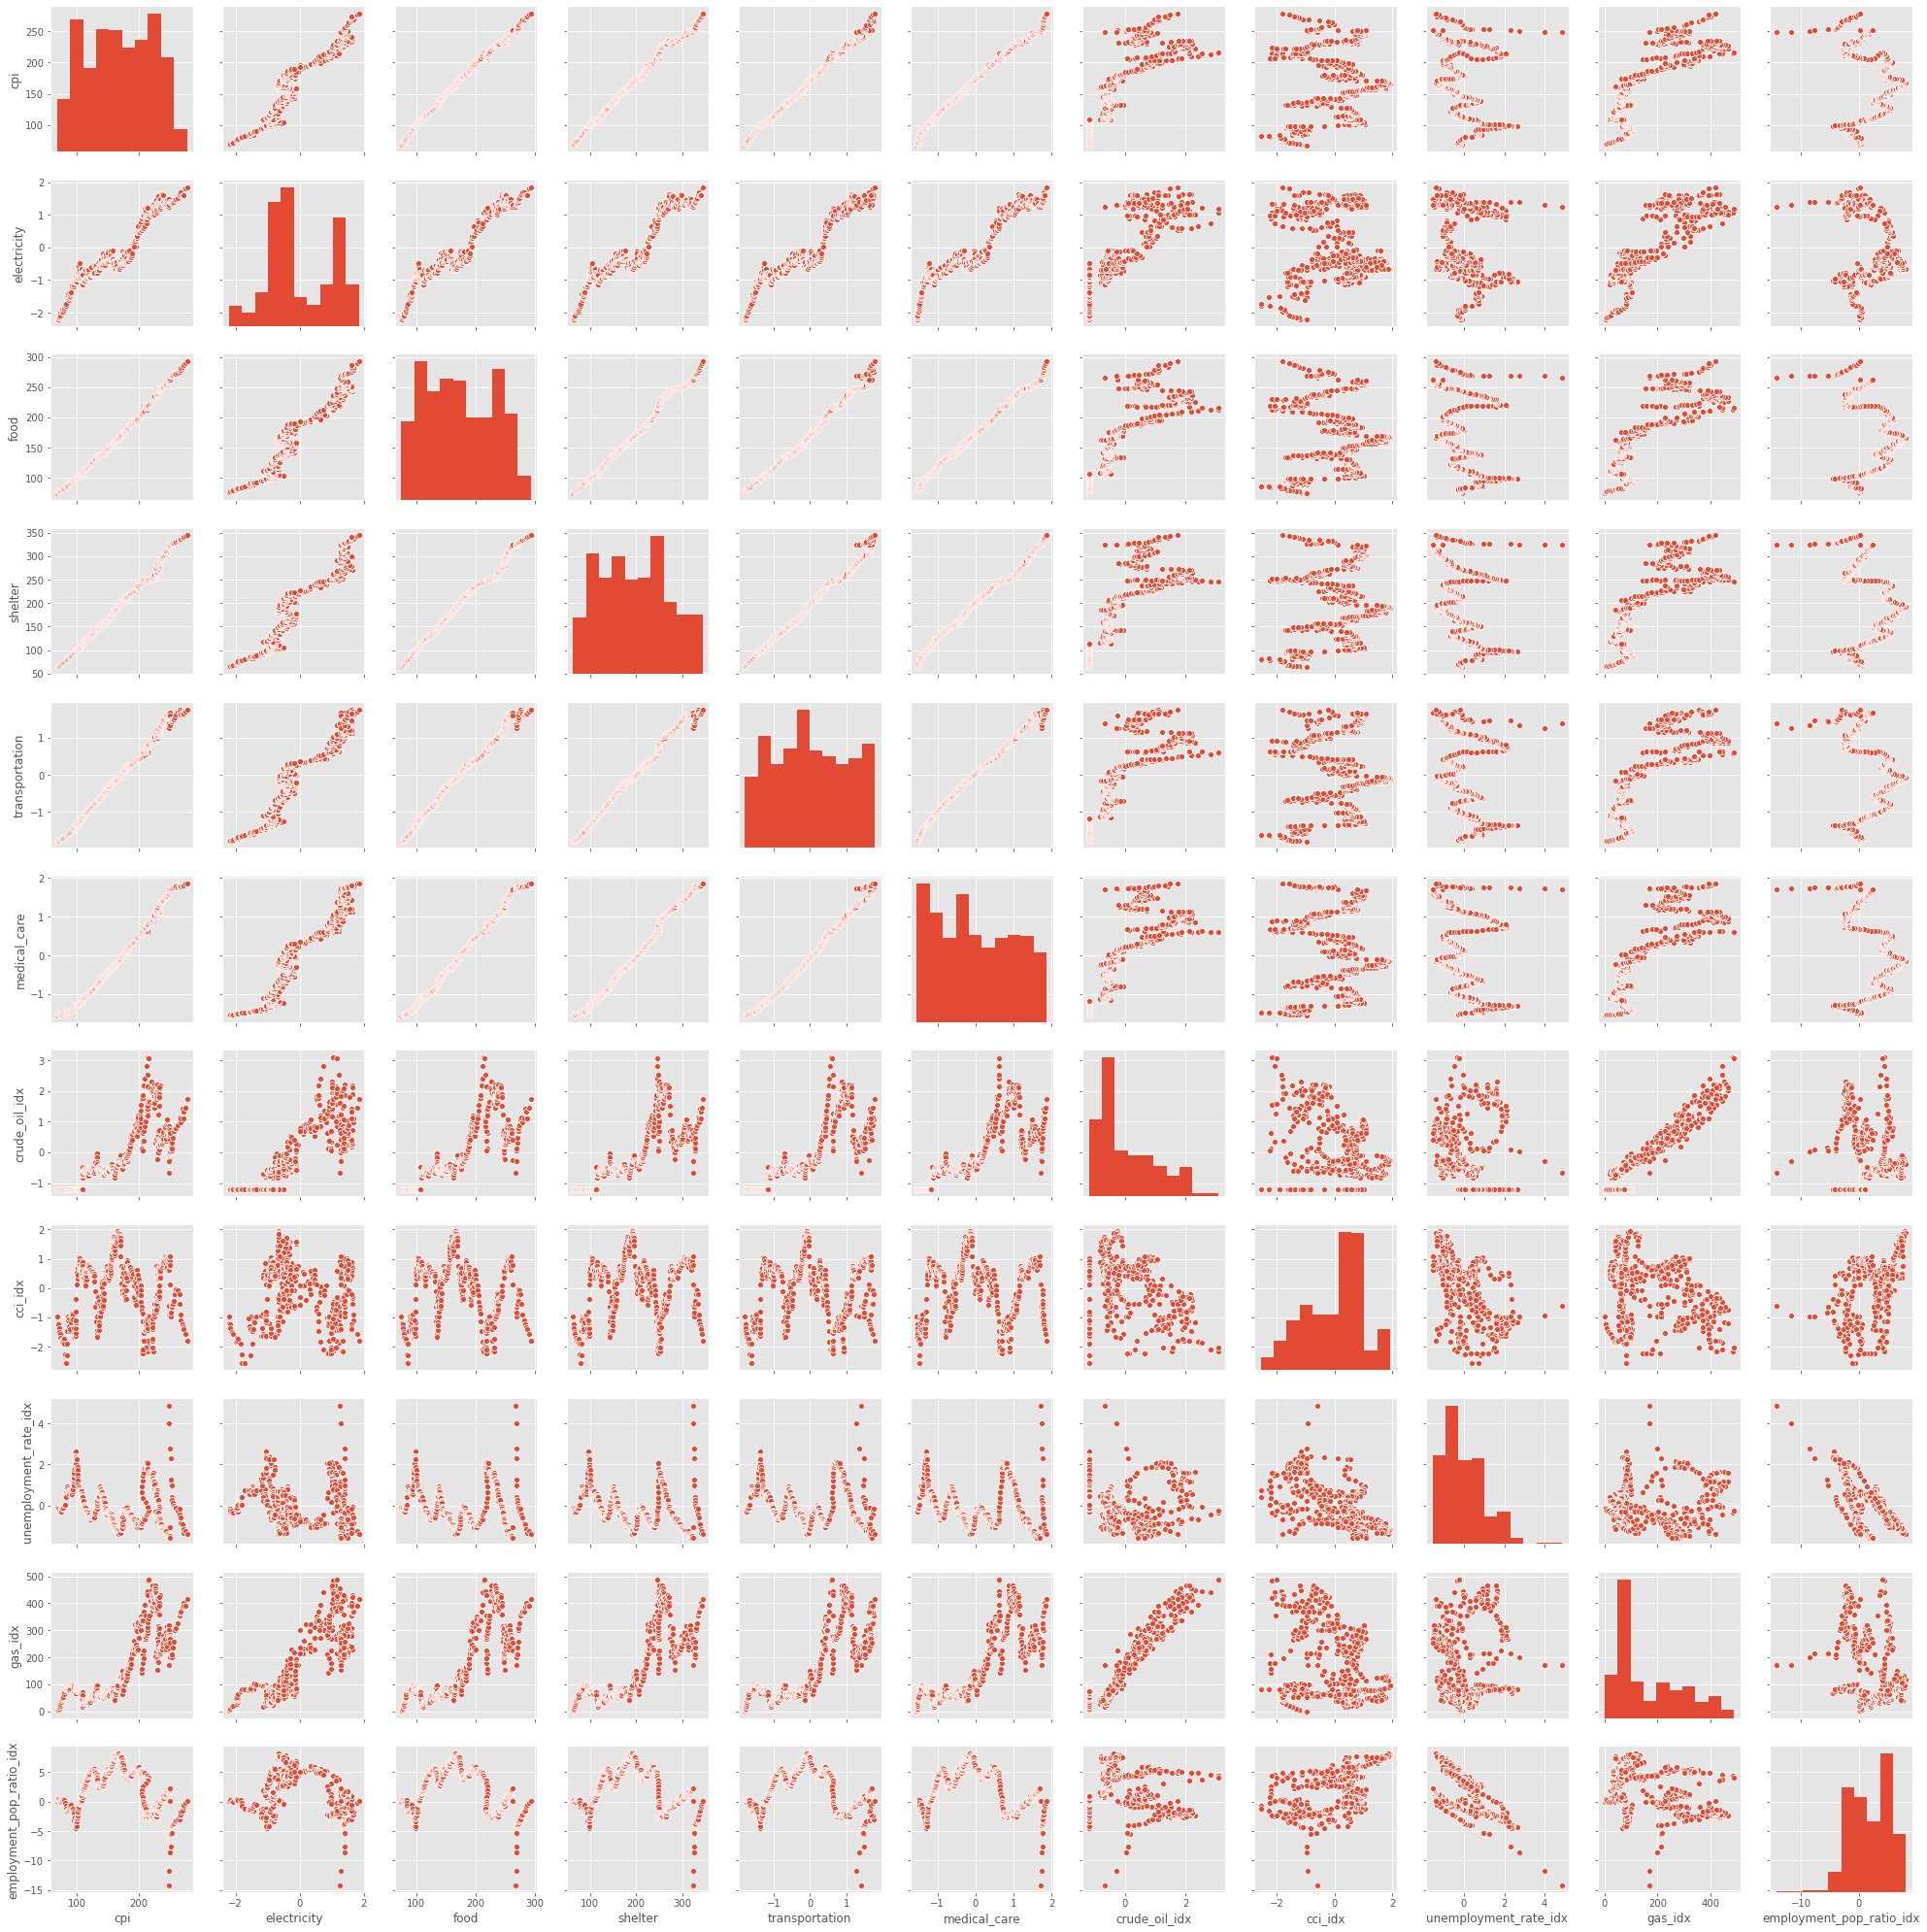

In [31]:
# another pairplot visualization created to look at relationships between variables
sns.pairplot(subset_df)

In [32]:
subset_df.corr()
# why is unemployment_rate_idx only -22% with medical care?
# warrants additional study that will not be used for this project

cpi  electricity      food   shelter  \
cpi                       1.000000     0.956080  0.997556  0.995951   
electricity               0.956080     1.000000  0.959658  0.944936   
food                      0.997556     0.959658  1.000000  0.995505   
shelter                   0.995951     0.944936  0.995505  1.000000   
transportation            0.996409     0.952092  0.995730  0.995757   
medical_care              0.995505     0.954116  0.998142  0.996580   
crude_oil_idx             0.821152     0.823553  0.810301  0.781761   
cci_idx                   0.040527    -0.036171  0.018976  0.060954   
unemployment_rate_idx    -0.230748    -0.090571 -0.214773 -0.257748   
gas_idx                   0.819845     0.846684  0.816806  0.784884   
employment_pop_ratio_idx -0.171557    -0.318211 -0.214809 -0.170054   

                          transportation  medical_care  crude_oil_idx  \
cpi                             0.996409      0.995505       0.821152   
electricity                     0.952092      0.954116       0.823553   
food                            0.995730      0.998142       0.810301   
shelter                         0.995757      0.996580       0.781761   
transportation                  1.000000      0.996205       0.794404   
medical_care                    0.996205      1.000000       0.796872   
crude_oil_idx                   0.794404      0.796872       1.000000   
cci_idx                         0.075596      0.028324      -0.234173   
unemployment_rate_idx          -0.257641     -0.223679      -0.048266   
gas_idx                         0.792835      0.808120       0.946958   
employment_pop_ratio_idx       -0.165350     -0.220945      -0.193516   

                           cci_idx  unemployment_rate_idx   gas_idx  \
cpi                       0.040527              -0.230748  0.819845   
electricity              -0.036171              -0.090571  0.846684   
food                      0.018976              -0.214773  0.816806   
shelter                   0.060954              -0.257748  0.784884   
transportation            0.075596              -0.257641  0.792835   
medical_care              0.028324              -0.223679  0.808120   
crude_oil_idx            -0.234173              -0.048266  0.946958   
cci_idx                   1.000000              -0.582325 -0.290921   
unemployment_rate_idx    -0.582325               1.000000  0.026222   
gas_idx                  -0.290921               0.026222  1.000000   
employment_pop_ratio_idx  0.538252              -0.705483 -0.379426   

                          employment_pop_ratio_idx  
cpi                                      -0.171557  
electricity                              -0.318211  
food                                     -0.214809  
shelter                                  -0.170054  
transportation                           -0.165350  
medical_care                             -0.220945  
crude_oil_idx                            -0.193516  
cci_idx                                   0.538252  
unemployment_rate_idx                    -0.705483  
gas_idx                                  -0.379426  
employment_pop_ratio_idx                  1.000000

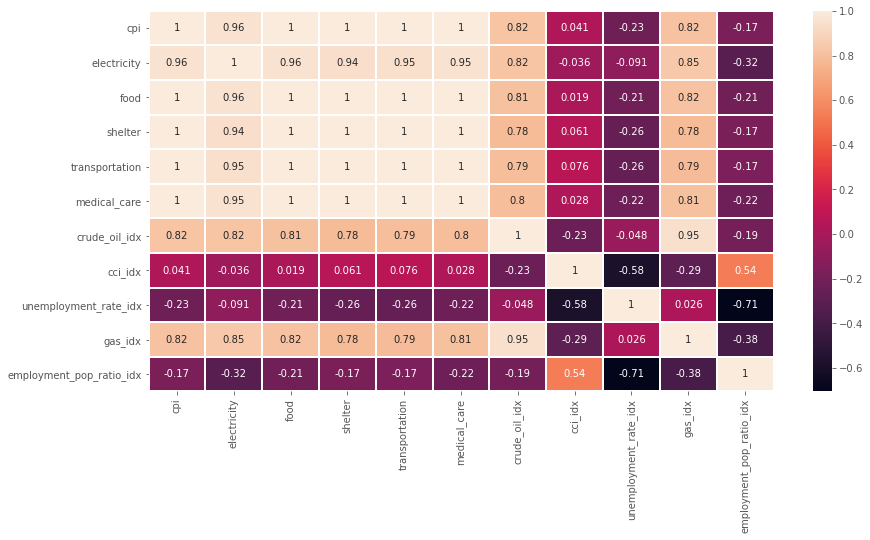

In [33]:
sns.heatmap(subset_df.corr(), annot=True, lw=1)

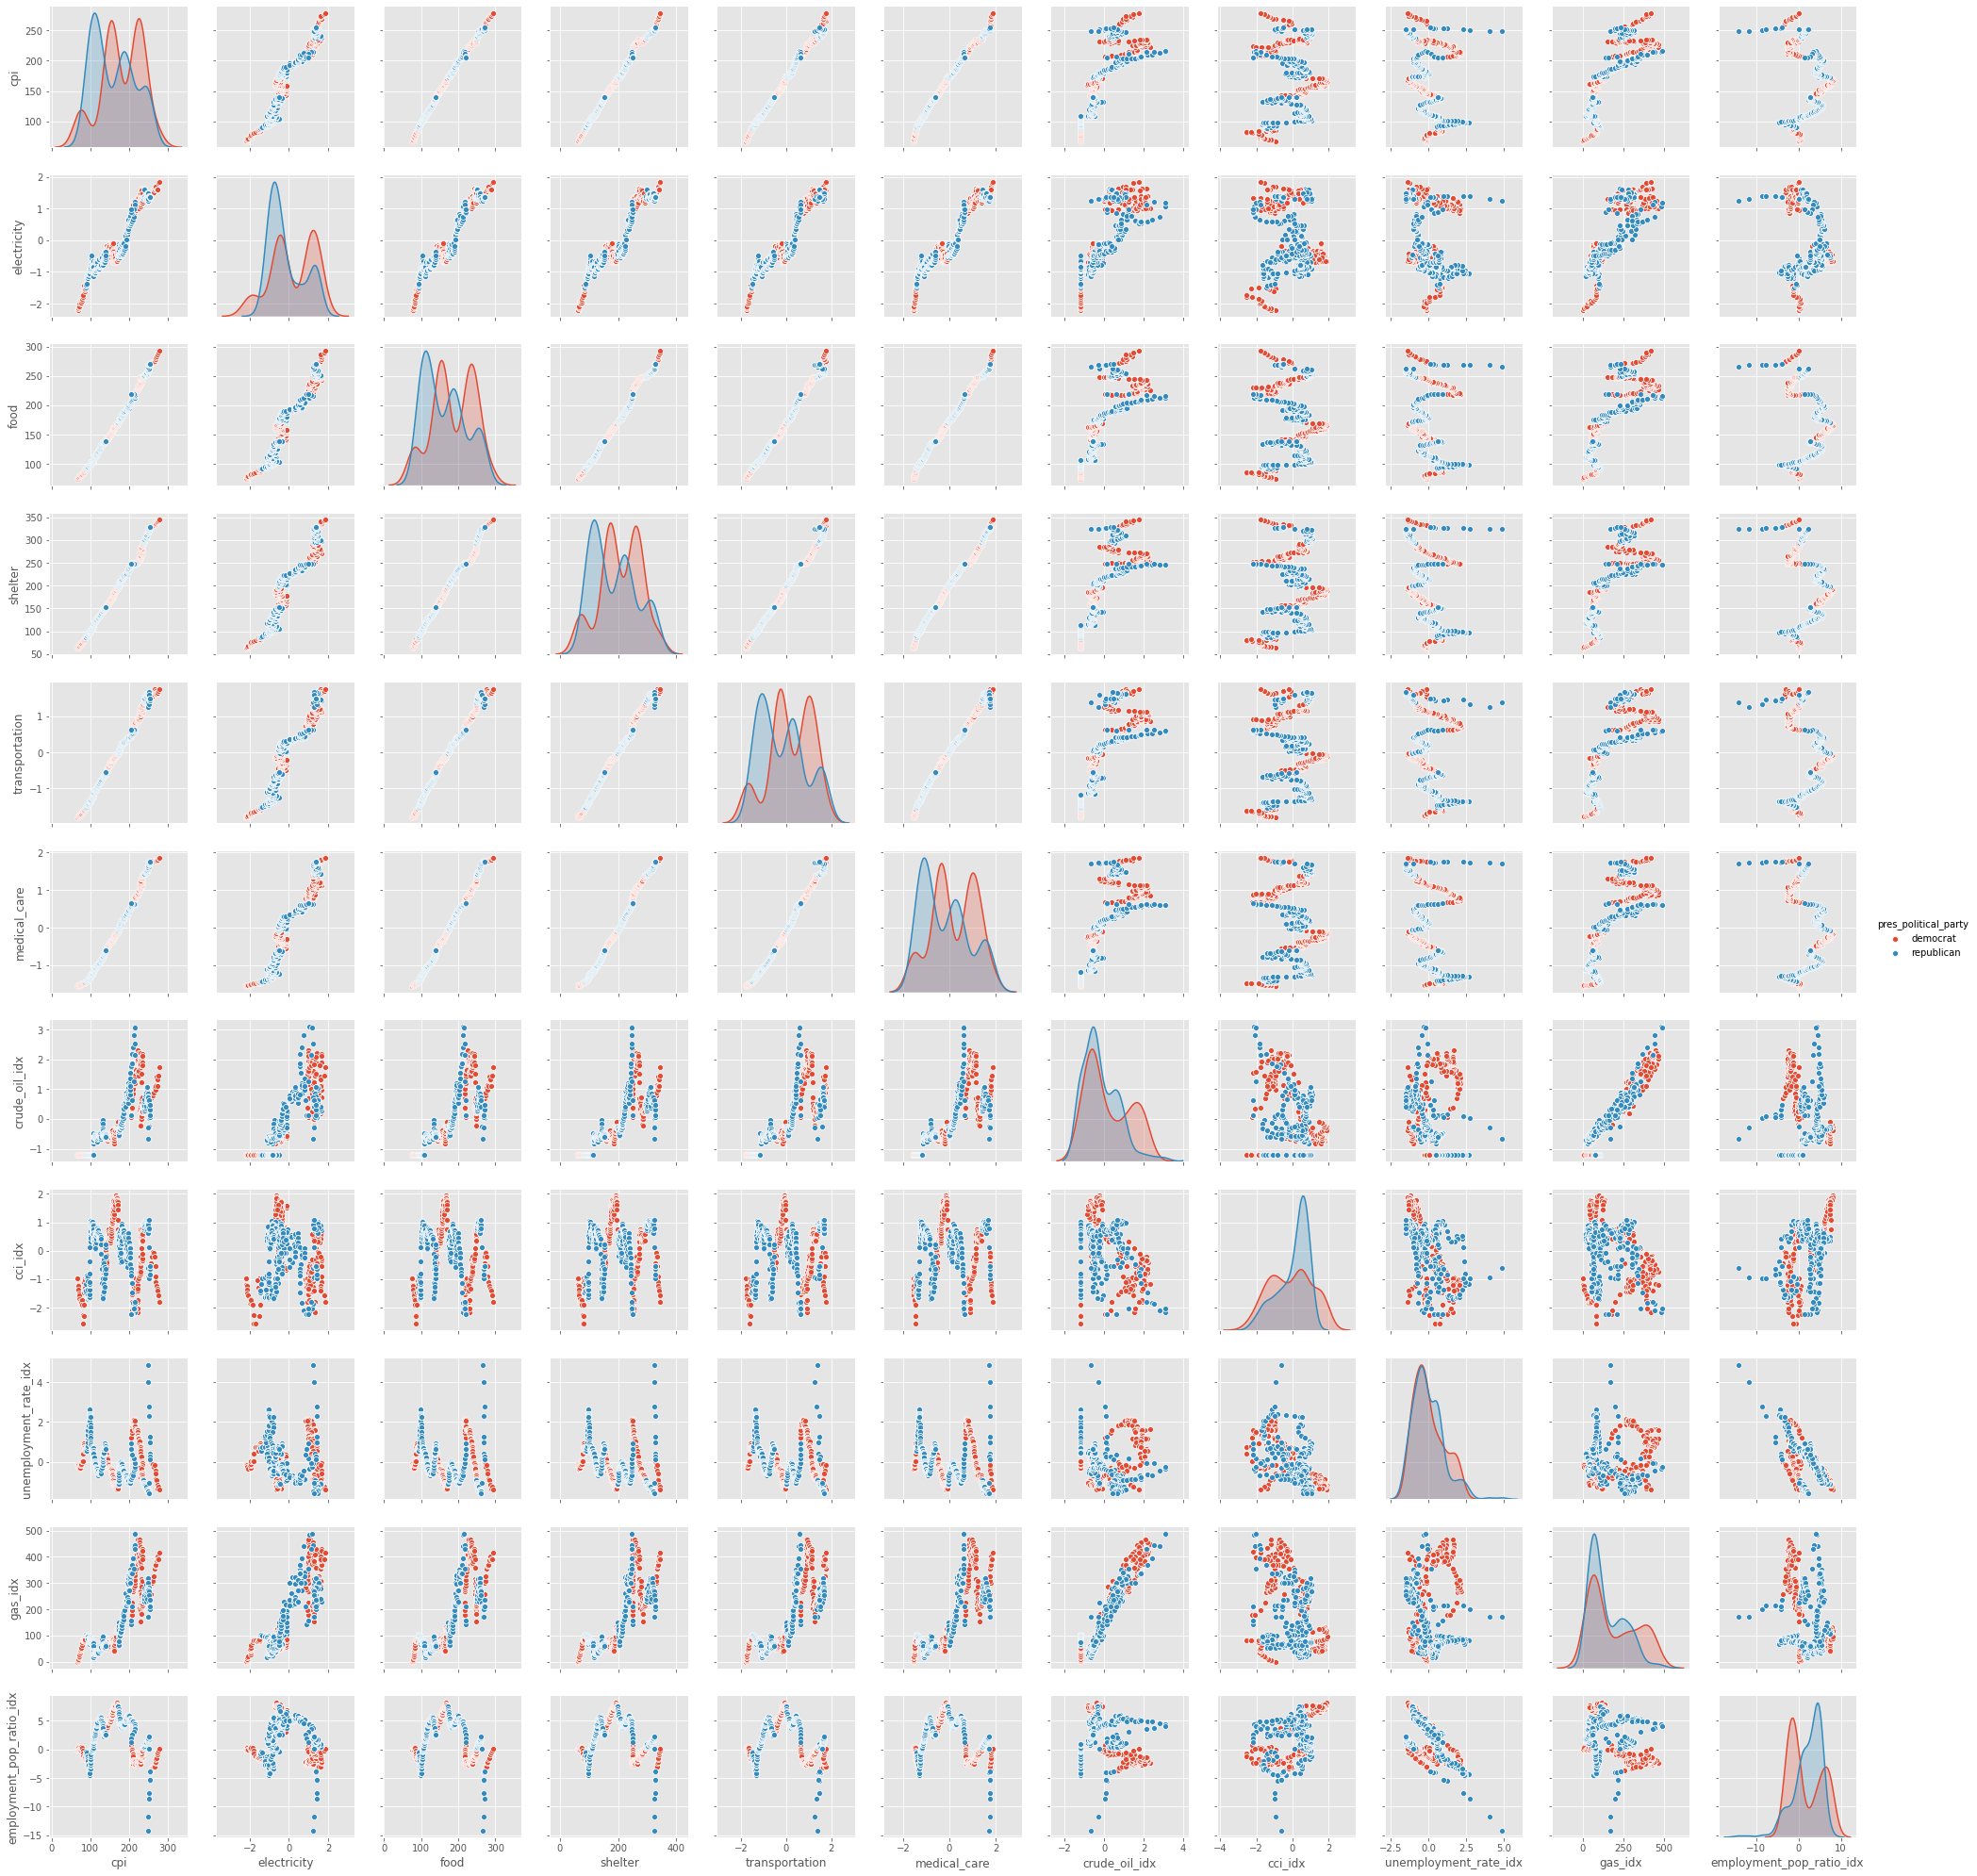

In [34]:
# looking at categorical variable pres_political_party for EDA
sns.pairplot(subset_df, hue = "pres_political_party")

In [36]:
# used variable subset to preserve its name for code but it's not a subset anymore
subset_df.shape

(520, 12)

Text(0, 0.5, 'Index')

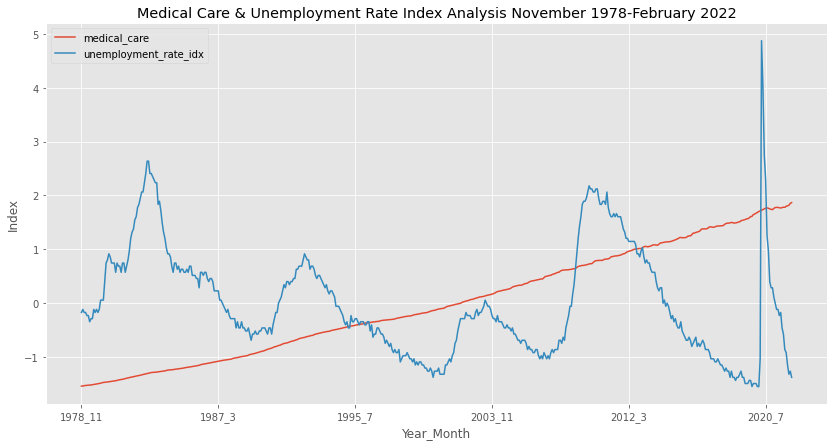

In [37]:
# plot of variables
# data was not adjusted for season
subset_df[["medical_care", "unemployment_rate_idx"]].plot()
plt.title("Medical Care & Unemployment Rate Index Analysis November 1978-February 2022")
plt.xlabel("Year_Month")
plt.ylabel("Index")

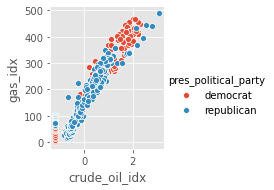

In [38]:
sns.pairplot(subset_df, x_vars=["crude_oil_idx"], y_vars=["gas_idx"], hue="pres_political_party")
# correlated relationship with 'gas_idx' & 'crude_oil_idx'
# when President is Republican crude oil and gas index lower.
# when President is Democrat crude oil and gas index higher. This could be because of clean energy focus.

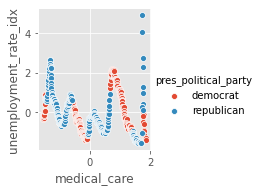

In [39]:
sns.pairplot(subset_df, x_vars=["medical_care"], y_vars=["unemployment_rate_idx"], hue="pres_political_party")
# there are maximums for both presidential parties. the minimum more for republican presidents.
# when curve goes up it's a positive dependency. when curve goes down it's a negative dependency.
# not in terms of time. 
# overlapping curves for medical_care and unemployment relationship for the two parties which the hue depicts.

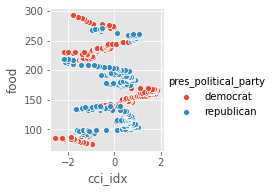

In [40]:
sns.pairplot(subset_df, x_vars=["cci_idx"], y_vars=["food"], hue="pres_political_party")
# bigger concentration of republicans
# can expect food values to be higher for lower cci index 
# negative cci index is less than median
# when cci is less than average (zero), then food index is 
# republicans have wider range
# democrats controls more food, food index doesn't change much during their presendcency. republican the range changes a lot.
# higher consumer confidence with food when democrats are in office. More unstable when republicans are in office.

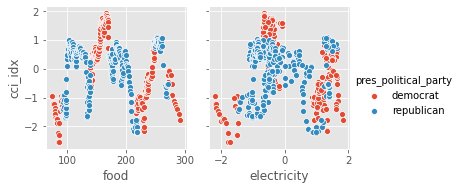

In [41]:
sns.pairplot(subset_df, x_vars=["food", "electricity"], y_vars=["cci_idx"], hue="pres_political_party")

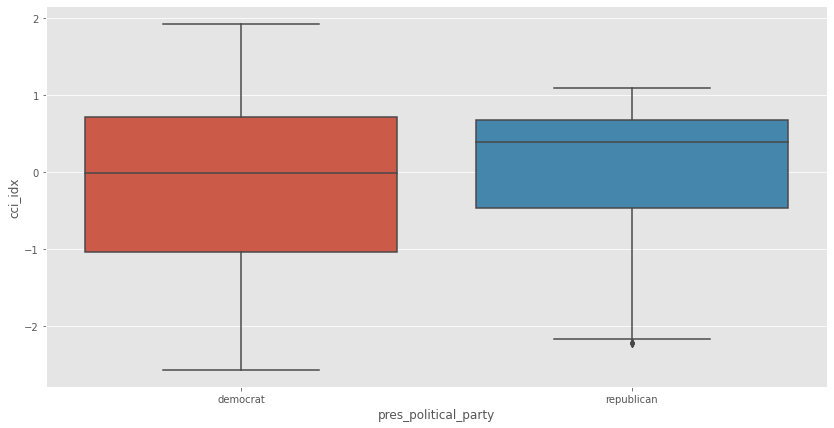

In [42]:
sns.boxplot(y="cci_idx", x="pres_political_party", data=subset_df)
# more compact box is means data is centered around the average
# cci_idx is not as compact for democrats 
# histogram would show the number of democrats vs. republicans
# if I have comparable # of points for both categories, then I can compare them. If not, accuracy won't be comparable.
# the tighter the data is there is less variation
# when republicans were in office there was a slightly higher cci according to data we have.

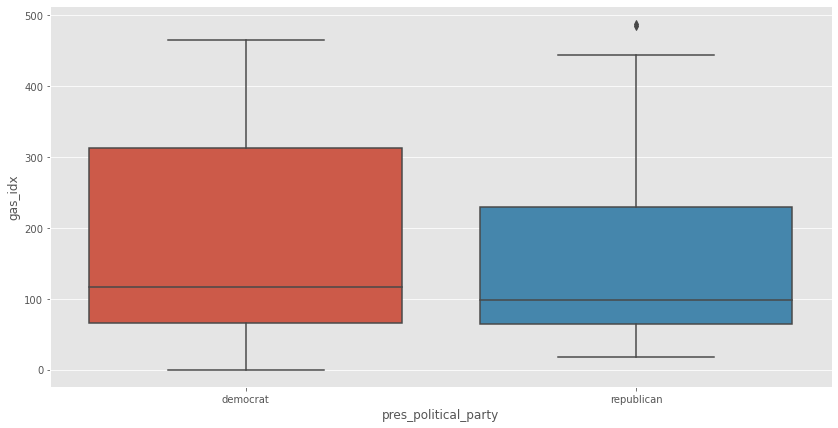

In [43]:
sns.boxplot(y="gas_idx", x="pres_political_party", data=subset_df)
# there is an outlier for Republican, near gas index 500
# more compact of a distribution
# median is the same for both parties. but because median is not in the middle it is skewed, not a normal distribution.

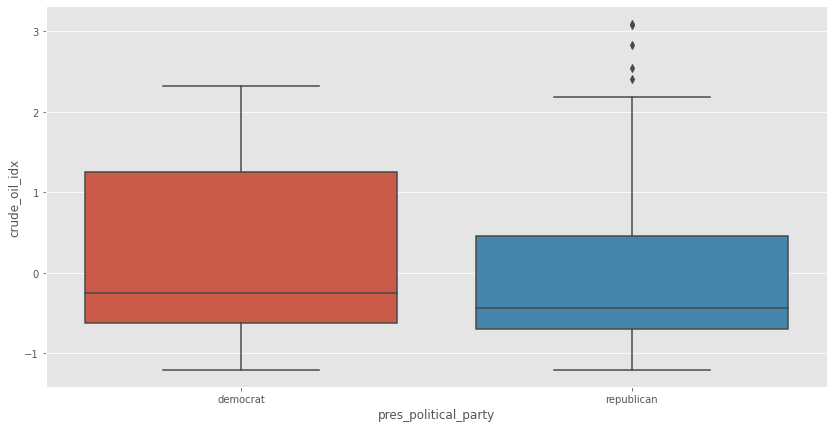

In [44]:
sns.boxplot(y="crude_oil_idx", x="pres_political_party", data=subset_df)
# range is increasing from democrats, but pretty similar for both parties. more compact for republican, but also has outliers.


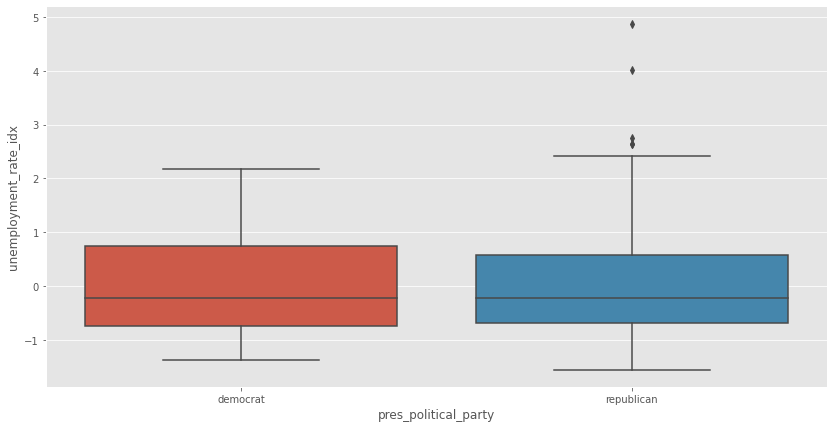

In [45]:
sns.boxplot(y="unemployment_rate_idx", x="pres_political_party", data=subset_df)
# very similar ranges for both parties, but republicans show outliers

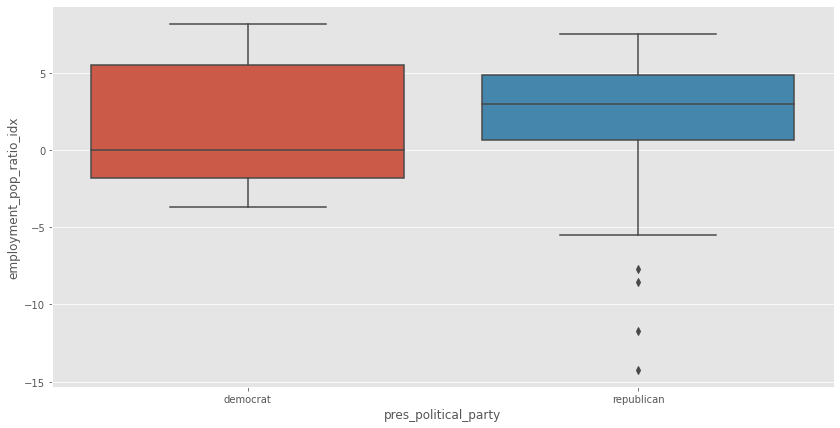

In [46]:
sns.boxplot(y="employment_pop_ratio_idx", x="pres_political_party", data=subset_df)
# outliers could be covid related
# employment is greater when democrats are in office

In [47]:
# the independent variable 'shelter' will be used to predict 'cpi'
X = subset_df[["shelter"]]
X.head()

shelter
ym              
1978_11     63.3
1978_12     63.5
1979_1      64.0
1979_2      64.9
1979_3      65.5

In [48]:
# 'cpi' will be the dependent variable for modeling
Y = subset_df["cpi"]
Y.head()

ym
1978_11    67.7
1978_12    68.1
1979_1     68.7
1979_2     69.5
1979_3     70.3
Name: cpi, dtype: float64

In [54]:
# Creating train and test split to help prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 1)
(208, 1)
(312,)
(208,)


In [58]:
# using Linear Regression for Model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [59]:
# print the intercept
print(model.intercept_)

27.262287441207974


In [60]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter # since number is a positive number, there will be an increase with predictor variable and target variable

Coefficient
shelter     0.727773

In [67]:
predictions = model.predict(X_test)
#predictions 

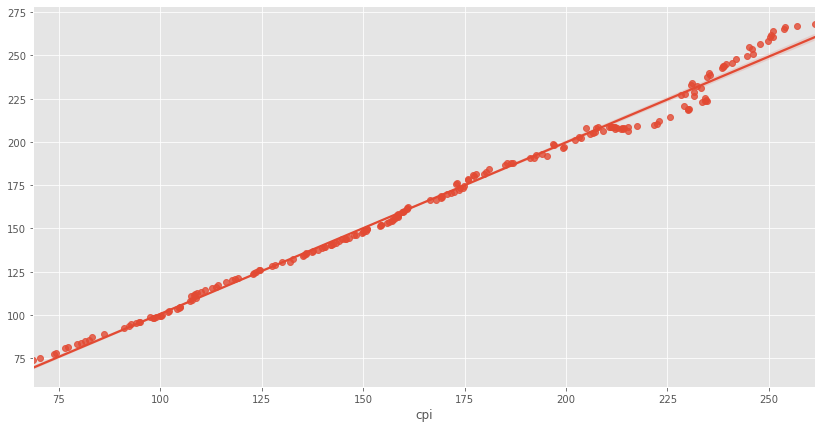

In [64]:
sns.regplot(y_test, predictions) #showing good results - might be too good of results

In [68]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.620e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):          4.45e-323
Time:                        00:05:33   Log-Likelihood:                -950.22
No. Observations:                 312   AIC:                             1904.
Df Residuals:                     310   BIC:                             1912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2623      0.812     33.590      0.0

In [81]:
X = subset_df[["food"]]
X.head()

food
ym           
1978_11  74.7
1978_12  75.1
1979_1   76.4
1979_2   77.7
1979_3   78.4

In [82]:
Y = subset_df["cpi"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 1)
(208, 1)
(312,)
(208,)


In [84]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [85]:
# print the intercept
print(model.intercept_)

6.801253749814435


In [86]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
food     0.940036

In [89]:
predictions = model.predict(X_test)
#predictions

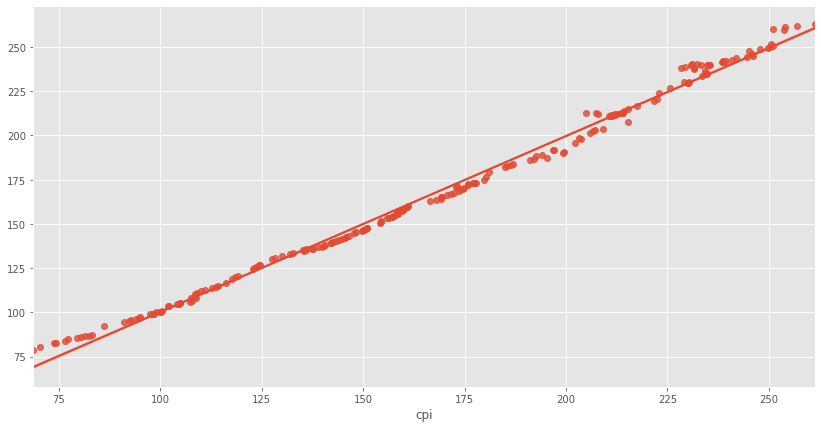

In [88]:
sns.regplot(y_test,predictions) # showing good results once again for predictors

In [90]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.838e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        13:51:36   Log-Likelihood:                -851.64
No. Observations:                 312   AIC:                             1707.
Df Residuals:                     310   BIC:                             1715.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8013      0.664     10.237      0.0

In [69]:
X = subset_df[["medical_care", "food"]]
X.head()

medical_care  food
ym                         
1978_11     -1.543840  74.7
1978_12     -1.542398  75.1
1979_1      -1.535911  76.4
1979_2      -1.532307  77.7
1979_3      -1.529424  78.4

In [70]:
Y = subset_df["cpi"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 2)
(208, 2)
(312,)
(208,)


In [72]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
# print the intercept
print(model.intercept_)

-1.256644610617201


In [74]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
medical_care    -2.656900
food             0.986351

In [75]:
predictions = model.predict(X_test)
#predictions

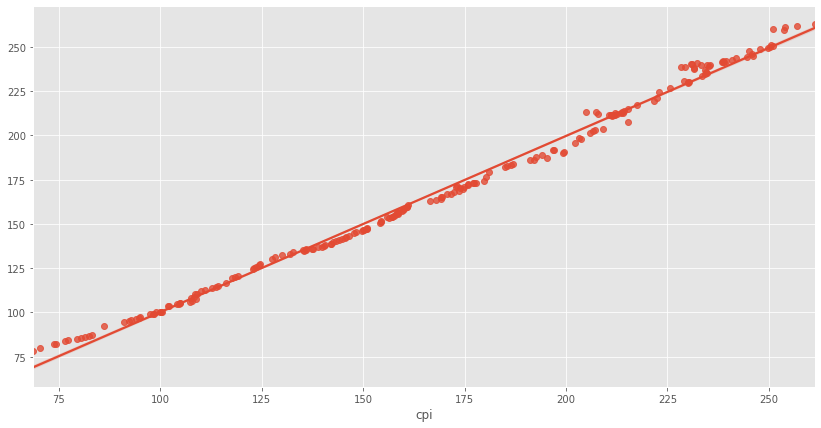

In [76]:
sns.regplot(y_test,predictions) # showing good results once again for predictors

In [77]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.415e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        00:06:33   Log-Likelihood:                -851.33
No. Observations:                 312   AIC:                             1709.
Df Residuals:                     309   BIC:                             1720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2566     10.219     -0.123   

In [92]:
X = subset_df[["gas_idx"]]
X.head()

gas_idx
ym               
1978_11  0.000000
1978_12  1.438849
1979_1   3.021583
1979_2   5.035971
1979_3   8.633094

In [93]:
Y = subset_df["cpi"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 1)
(208, 1)
(312,)
(208,)


In [95]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
# print the intercept
print(model.intercept_)

112.44427195352401


In [97]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
gas_idx     0.346625

In [98]:
predictions = model.predict(X_test)
#predictions

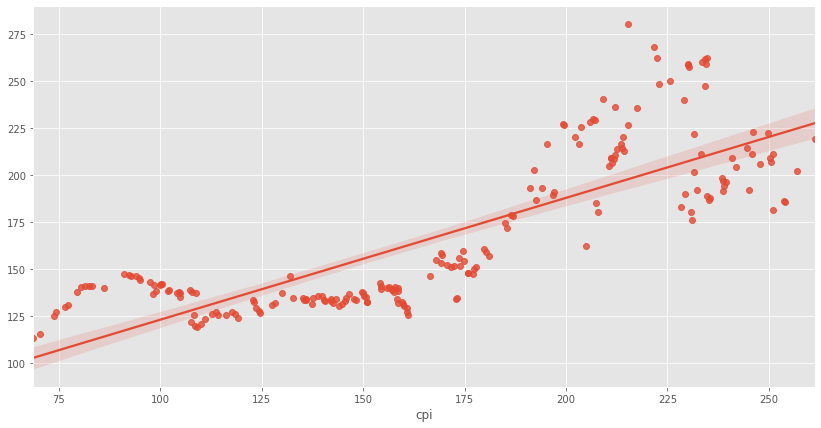

In [99]:
sns.regplot(y_test,predictions)

In [100]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     656.0
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.68e-78
Time:                        13:55:24   Log-Likelihood:                -1516.8
No. Observations:                 312   AIC:                             3038.
Df Residuals:                     310   BIC:                             3045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.4443      2.913     38.605      0.0

In [101]:
X = subset_df[["electricity", "food", "shelter", "transportation", "medical_care", "crude_oil_idx", "cci_idx",
              "unemployment_rate_idx", "gas_idx", "employment_pop_ratio_idx"]]
X.head()

electricity  food  shelter  transportation  medical_care  \
ym                                                                  
1978_11    -2.197629  74.7     63.3       -1.785689     -1.543840   
1978_12    -2.197629  75.1     63.5       -1.780387     -1.542398   
1979_1     -2.197629  76.4     64.0       -1.776409     -1.535911   
1979_2     -2.158013  77.7     64.9       -1.772432     -1.532307   
1979_3     -2.158013  78.4     65.5       -1.767129     -1.529424   

         crude_oil_idx   cci_idx  unemployment_rate_idx   gas_idx  \
ym                                                                  
1978_11       -1.20348 -0.952845              -0.175506  0.000000   
1978_12       -1.20348 -1.192165              -0.118108  1.438849   
1979_1        -1.20348 -1.209481              -0.175506  3.021583   
1979_2        -1.20348 -1.219944              -0.175506  5.035971   
1979_3        -1.20348 -1.350529              -0.232905  8.633094   

         employment_pop_ratio_idx  
ym                                 
1978_11                  0.000000  
1978_12                  0.000000  
1979_1                   0.167224  
1979_2                   0.501672  
1979_3                   0.334448

In [102]:
Y = subset_df["cpi"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 10)
(156, 10)
(364,)
(156,)


In [104]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [105]:
# print the intercept
print(model.intercept_)
training_score = model.score(X_train,y_train)
print(training_score)

test_score = model.score(X_test,y_test)
print(test_score)
# these scores confirm the validity of the warning in the mulitivariate model that there are multiple collinear variables

22.423033705057207
0.9995293588077776
0.9994902035944588


In [106]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
electricity                  0.524180
food                         0.509129
shelter                      0.255785
transportation               7.305862
medical_care                -3.546483
crude_oil_idx               -1.158512
cci_idx                      0.708479
unemployment_rate_idx        3.013953
gas_idx                      0.040317
employment_pop_ratio_idx     1.204876

In [109]:
predictions = model.predict(X_test)
#predictions

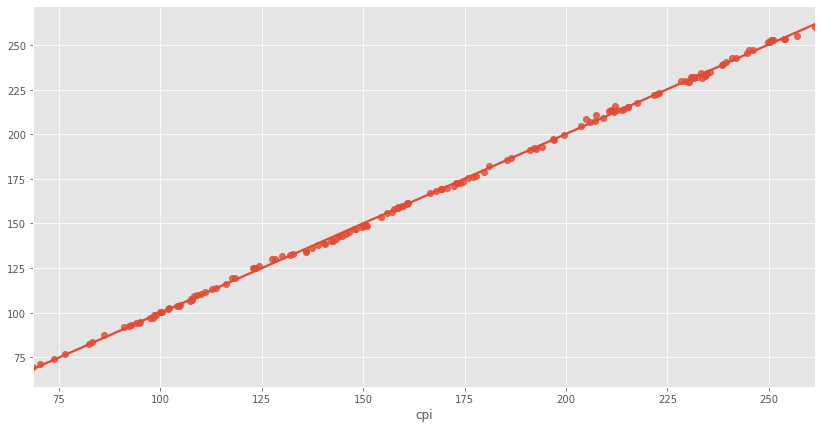

In [110]:
sns.regplot(y_test,predictions)

In [111]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.497e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        15:45:40   Log-Likelihood:                -576.27
No. Observations:                 364   AIC:                             1175.
Df Residuals:                     353   BIC:                             1217.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   